# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: Please specify here (the trainee should this this)
- **Hidden Layers**: Please specify here (the trainee should fill this)
- **Output Layer**: Please specify here (the trainee should fill this)

## Training

- **Optimizer**: Please specify here (the trainee should fill this)
- **Loss Function**: Please specify here (the trainee should fill this)
- **Metrics**: Please specify here (the trainee should fill this)
- **Epochs**: Please specify here (the trainee should fill this)
- **Batch Size**: Please specify here (the trainee should fill this)
- **Validation Split**: Please specify here (the trainee should fill this)

## Evaluation
- Please specify here (the trainee should fill this)

If you need to change the steps or add more please do so and explain why!

# Import libraries

In [237]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data and EDA

In [238]:
df = pd.read_csv("Churn_Modelling_Exercise.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

## Preprocessing

### Drop unnecessary columns

### One-hot-encoder and Label-encoder

In [240]:
#drop customerID
df.drop('customerID', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('MultipleLines', axis=1, inplace=True)
df.drop('InternetService', axis=1, inplace=True)

In [241]:
#label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

<Axes: >

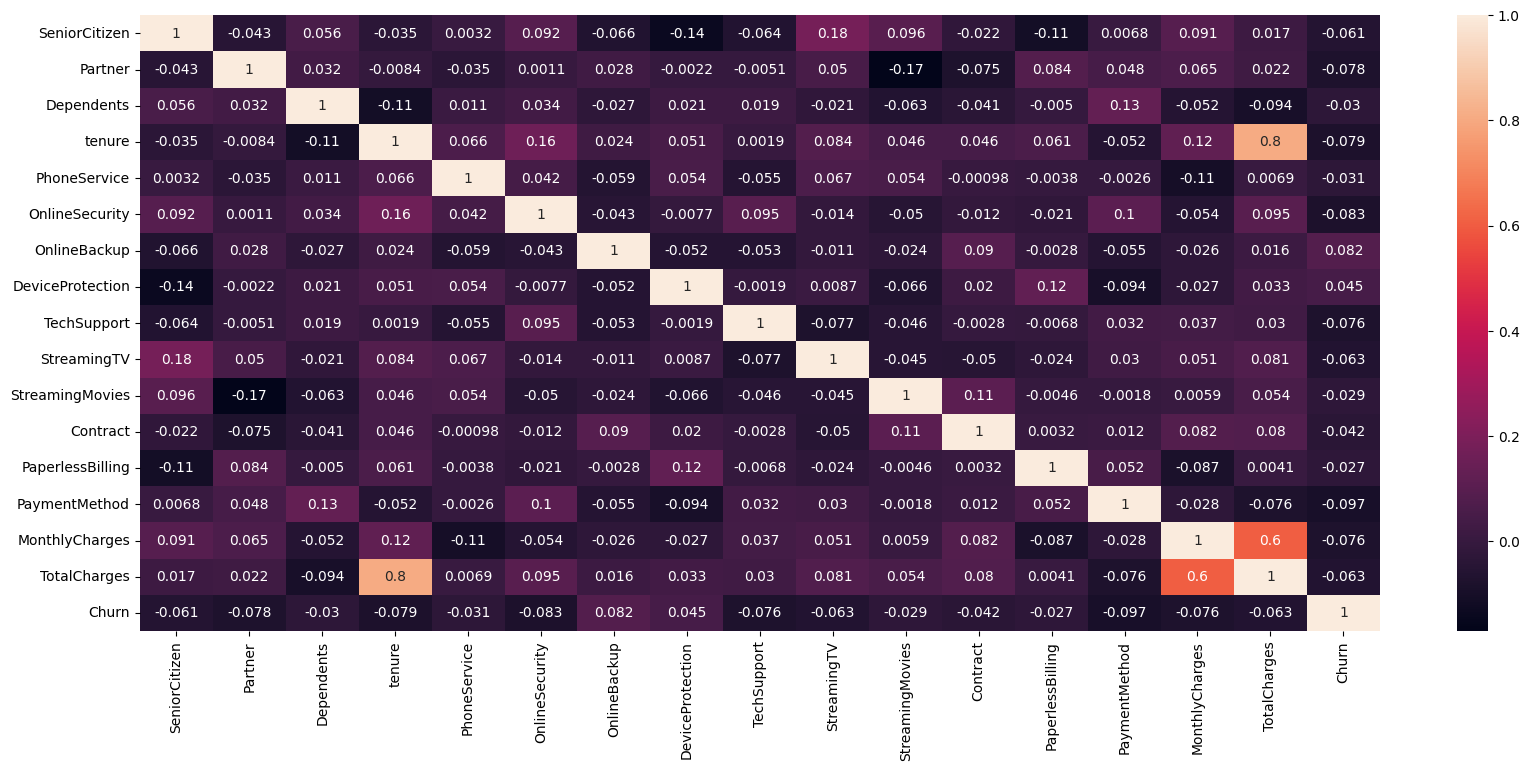

In [242]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)

In [243]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,5,0,0,2,0,0,0,1,0,1,1,27.43,137.15,1
1,0,0,0,42,1,2,2,0,0,1,1,2,0,2,38.28,1607.76,1
2,0,0,0,61,1,0,2,0,2,2,0,1,0,0,106.44,6492.84,1
3,1,0,1,22,1,1,1,2,0,1,2,0,0,2,92.49,2034.78,0
4,1,1,1,21,0,0,0,1,0,0,1,1,0,0,19.63,412.23,1


## Selecting Features && Train Test Split

### Selecting Features

In [244]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [245]:
# Selecting Features standerdScaler
Scaler = StandardScaler()
Scaler.fit(X[['MonthlyCharges','TotalCharges']])
X[['MonthlyCharges','TotalCharges']] = Scaler.transform(X[['MonthlyCharges','TotalCharges']])


### Train Test Split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [247]:
model = Sequential()

### Adding the input layer

In [248]:
model.add(Dense(units=24, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the hidden layers

In [249]:
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=24, activation='relu'))

### Adding the output layer

In [250]:
model.add(Dense(units=1, activation='sigmoid'))

### Compiling the model

In [251]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Display model summary

In [252]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model

In [253]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5622 - loss: 0.6852 - val_accuracy: 0.4167 - val_loss: 0.7102
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6241 - loss: 0.6704 - val_accuracy: 0.4167 - val_loss: 0.7279
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 0.6894 - val_accuracy: 0.4375 - val_loss: 0.7108
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 0.6718 - val_accuracy: 0.4792 - val_loss: 0.7116
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 0.6681 - val_accuracy: 0.4583 - val_loss: 0.7128
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - loss: 0.6667 - val_accuracy: 0.5000 - val_loss: 0.7096
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.6594 - val_accuracy: 0.5208 - val_loss: 0.7002
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.6585 - val_accuracy: 0.5208 - val_loss: 0.

## Evaluating the model

In [254]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4458 - loss: 1.1357 


[1.2487635612487793, 0.44999998807907104]